In [1]:
import pandas as pd
df = pd.read_csv("customer_support_tickets.csv")
print("Shape:", df.shape)
df.head()


Shape: (8469, 17)


,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [2]:
df.info()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

In [3]:
 # Clean column names (remove spaces, lowercase, replace spaces with underscores)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [4]:
#Convert date columns to datetime
df['date_of_purchase'] = pd.to_datetime(df['date_of_purchase'], errors='coerce')

In [5]:
#  Fill missing satisfaction ratings with the mean
df['customer_satisfaction_rating'] = df['customer_satisfaction_rating'].fillna(
    df['customer_satisfaction_rating'].mean()
)

In [6]:
# Fill missing resolution/response text fields
df['time_to_resolution'] = df['time_to_resolution'].fillna("Unknown")
df['first_response_time'] = df['first_response_time'].fillna("Unknown")
df['resolution'] = df['resolution'].fillna("No Resolution Provided")

In [7]:
# Verify cleaning
print("✅ Missing Values per Column After Cleaning:")
print(df.isnull().sum())
print("\nData Types:\n", df.dtypes)

✅ Missing Values per Column After Cleaning:
ticket_id                       0
customer_name                   0
customer_email                  0
customer_age                    0
customer_gender                 0
product_purchased               0
date_of_purchase                0
ticket_type                     0
ticket_subject                  0
ticket_description              0
ticket_status                   0
resolution                      0
ticket_priority                 0
ticket_channel                  0
first_response_time             0
time_to_resolution              0
customer_satisfaction_rating    0
dtype: int64

Data Types:
 ticket_id                                int64
customer_name                           object
customer_email                          object
customer_age                             int64
customer_gender                         object
product_purchased                       object
date_of_purchase                datetime64[ns]
ticket_type           

In [8]:
print(df.columns.tolist())


['ticket_id', 'customer_name', 'customer_email', 'customer_age', 'customer_gender', 'product_purchased', 'date_of_purchase', 'ticket_type', 'ticket_subject', 'ticket_description', 'ticket_status', 'resolution', 'ticket_priority', 'ticket_channel', 'first_response_time', 'time_to_resolution', 'customer_satisfaction_rating']


In [9]:

import numpy as np

# --- Convert to datetime (specifying format to avoid warnings) ---
df['first_response_time'] = pd.to_datetime(df['first_response_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['time_to_resolution'] = pd.to_datetime(df['time_to_resolution'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# --- Extract response time in hours ---
df['first_response_hours'] = df['first_response_time'].dt.hour + df['first_response_time'].dt.minute / 60

# --- Calculate resolution duration (in hours) ---
def calculate_resolution_hours(row):
    if pd.notna(row['time_to_resolution']) and pd.notna(row['first_response_time']):
        diff = (row['time_to_resolution'] - row['first_response_time']).total_seconds() / 3600
        if diff < 0:  # Handles next-day resolutions
            diff += 24
        return diff
    return np.nan

df['resolution_hours'] = df.apply(calculate_resolution_hours, axis=1)

# --- Fill missing with mean (no inplace warning) ---
df['first_response_hours'] = df['first_response_hours'].fillna(df['first_response_hours'].mean())
df['resolution_hours'] = df['resolution_hours'].fillna(df['resolution_hours'].mean())

# --- Show output ---
print("✅ Clean conversion successful — no warnings!")
print(df[['first_response_time', 'first_response_hours', 'time_to_resolution', 'resolution_hours']].head(10))


✅ Clean conversion successful — no warnings!
  first_response_time  first_response_hours  time_to_resolution  \
0 2023-06-01 12:15:36             12.250000                 NaT   
1 2023-06-01 16:45:38             16.750000                 NaT   
2 2023-06-01 11:14:38             11.233333 2023-06-01 18:05:38   
3 2023-06-01 07:29:40              7.483333 2023-06-01 01:57:40   
4 2023-06-01 00:12:42              0.200000 2023-06-01 19:53:42   
5                 NaT             12.020174                 NaT   
6                 NaT             12.020174                 NaT   
7                 NaT             12.020174                 NaT   
8 2023-06-01 10:32:47             10.533333                 NaT   
9 2023-06-01 09:25:48              9.416667                 NaT   

   resolution_hours  
0         11.773282  
1         11.773282  
2          6.850000  
3         18.466667  
4         19.683333  
5         11.773282  
6         11.773282  
7         11.773282  
8         11.773282

In [10]:
missing = df.isnull().sum()
print(" Missing Values per Column:")
print(missing[missing > 0] if missing.sum() > 0 else " No missing values found!")

 Missing Values per Column:
first_response_time    2819
time_to_resolution     5700
dtype: int64


In [11]:
# --- Handle Missing Time Columns Smartly ---

# Replace missing datetime values with 'Not Available' label
df['first_response_time'] = df['first_response_time'].fillna('Not Available')
df['time_to_resolution'] = df['time_to_resolution'].fillna('Not Available')

# Replace missing numerical conversions (if exist)
if 'first_response_hours' in df.columns:
    df['first_response_hours'].fillna(df['first_response_hours'].mean(), inplace=True)

if 'resolution_hours' in df.columns:
    df['resolution_hours'].fillna(df['resolution_hours'].mean(), inplace=True)

print(" Missing time values handled successfully!")

# Verify again
print("\nMissing Values After Fix:")
print(df[['first_response_time', 'time_to_resolution']].isnull().sum())


 Missing time values handled successfully!

Missing Values After Fix:
first_response_time    0
time_to_resolution     0
dtype: int64


C:\Users\Neha Prakash Jogdand\AppData\Local\Temp\ipykernel_6120\993719595.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['first_response_hours'].fillna(df['first_response_hours'].mean(), inplace=True)
C:\Users\Neha Prakash Jogdand\AppData\Local\Temp\ipykernel_6120\993719595.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on w

In [12]:
missing = df.isnull().sum()
print(" Missing Values per Column:")
print(missing[missing > 0] if missing.sum() > 0 else " No missing values found!")

 Missing Values per Column:
 No missing values found!


In [13]:
duplicates = df.duplicated().sum()
print(f"\n Duplicate Rows: {duplicates} {'Found' if duplicates > 0 else ' None found!'}")


 Duplicate Rows: 0  None found!


In [14]:
print(df.dtypes)

ticket_id                                int64
customer_name                           object
customer_email                          object
customer_age                             int64
customer_gender                         object
product_purchased                       object
date_of_purchase                datetime64[ns]
ticket_type                             object
ticket_subject                          object
ticket_description                      object
ticket_status                           object
resolution                              object
ticket_priority                         object
ticket_channel                          object
first_response_time                     object
time_to_resolution                      object
customer_satisfaction_rating           float64
first_response_hours                   float64
resolution_hours                       float64
dtype: object


In [15]:
# Check for negative or zero response/resolution times (invalid data)
if 'first_response_hours' in df.columns and 'resolution_hours' in df.columns:
    invalid_response = df[df['first_response_hours'] <= 0].shape[0]
    invalid_resolution = df[df['resolution_hours'] <= 0].shape[0]
    print(f"\n Invalid 'first_response_hours' entries: {invalid_response}")
    print(f" Invalid 'resolution_hours' entries: {invalid_resolution}")
else:
    print("\n Time columns not found! Skipping time validation check.")


 Invalid 'first_response_hours' entries: 6
 Invalid 'resolution_hours' entries: 2


In [16]:
# --- Fix invalid time entries ---

# Replace invalid (≤0) first_response_hours with mean of valid values
valid_response_mean = df.loc[df['first_response_hours'] > 0, 'first_response_hours'].mean()
df.loc[df['first_response_hours'] <= 0, 'first_response_hours'] = valid_response_mean

# Replace invalid (≤0) resolution_hours with mean of valid values
valid_resolution_mean = df.loc[df['resolution_hours'] > 0, 'resolution_hours'].mean()
df.loc[df['resolution_hours'] <= 0, 'resolution_hours'] = valid_resolution_mean

print(" Invalid response/resolution time entries fixed.")

# Verify correction
invalid_response = df[df['first_response_hours'] <= 0].shape[0]
invalid_resolution = df[df['resolution_hours'] <= 0].shape[0]
print(f"After fix → Invalid 'first_response_hours': {invalid_response}, Invalid 'resolution_hours': {invalid_resolution}")


 Invalid response/resolution time entries fixed.
After fix → Invalid 'first_response_hours': 0, Invalid 'resolution_hours': 0


In [17]:
 #Check for unexpected values in key columns
if 'ticket_status' in df.columns:
    print("\n📬 Unique Ticket Status values:")
    print(df['ticket_status'].unique())

if 'ticket_priority' in df.columns:
    print("\n🚦 Unique Ticket Priority values:")
    print(df['ticket_priority'].unique())

if 'ticket_channel' in df.columns:
    print("\n📞 Unique Ticket Channels:")
    print(df['ticket_channel'].unique())


📬 Unique Ticket Status values:
['Pending Customer Response' 'Closed' 'Open']

🚦 Unique Ticket Priority values:
['Critical' 'Low' 'High' 'Medium']

📞 Unique Ticket Channels:
['Social media' 'Chat' 'Email' 'Phone']


In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ticket_id                     8469 non-null   int64         
 1   customer_name                 8469 non-null   object        
 2   customer_email                8469 non-null   object        
 3   customer_age                  8469 non-null   int64         
 4   customer_gender               8469 non-null   object        
 5   product_purchased             8469 non-null   object        
 6   date_of_purchase              8469 non-null   datetime64[ns]
 7   ticket_type                   8469 non-null   object        
 8   ticket_subject                8469 non-null   object        
 9   ticket_description            8469 non-null   object        
 10  ticket_status                 8469 non-null   object        
 11  resolution                    

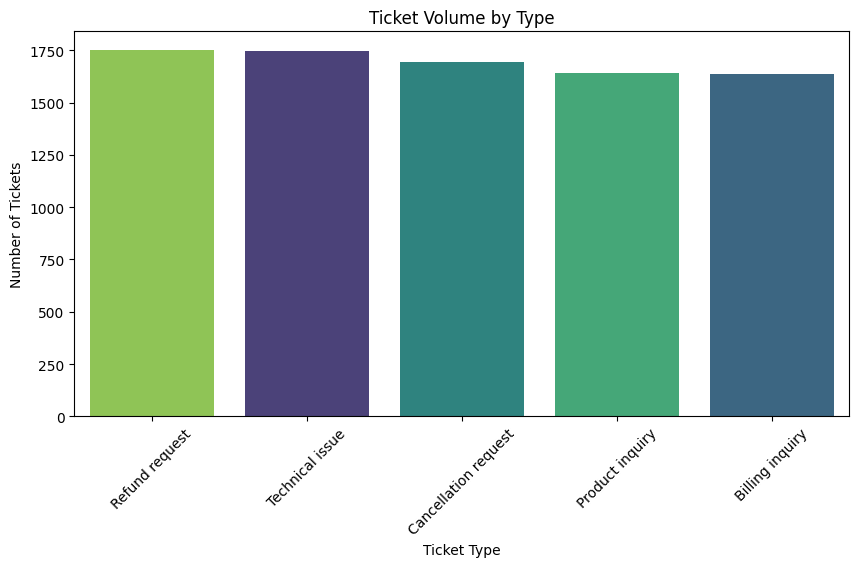

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))

sns.countplot(
    data=df,
    x='ticket_type',
    hue='ticket_type',          
    order=df['ticket_type'].value_counts().index,
    palette='viridis',
    legend=False                
)
plt.title('Ticket Volume by Type')
plt.xlabel('Ticket Type')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.show()


Most of the customer support tickets belong to the Technical Issue and Refund request compare to other 


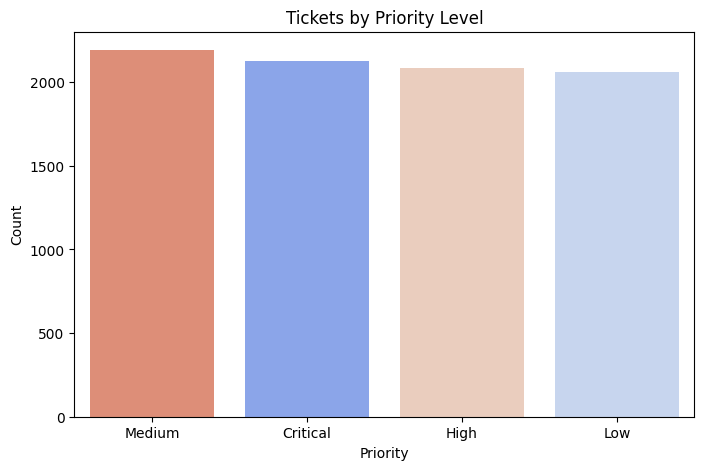

In [20]:
#Shows how many tickets come as Low, Medium, High, etc. — helps prioritize resources
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='ticket_priority',
    hue='ticket_priority',
    order=df['ticket_priority'].value_counts().index,
    palette='coolwarm',
    legend=False
)
plt.title('Tickets by Priority Level')
plt.xlabel('Priority')
plt.ylabel('Count')
plt.show()


The majority of tickets are marked as **Medium Priority**, with fewer classified as **High** or **Low**.
This suggests that most issues are moderately urgent — indicating a stable but steady workload for the support team.

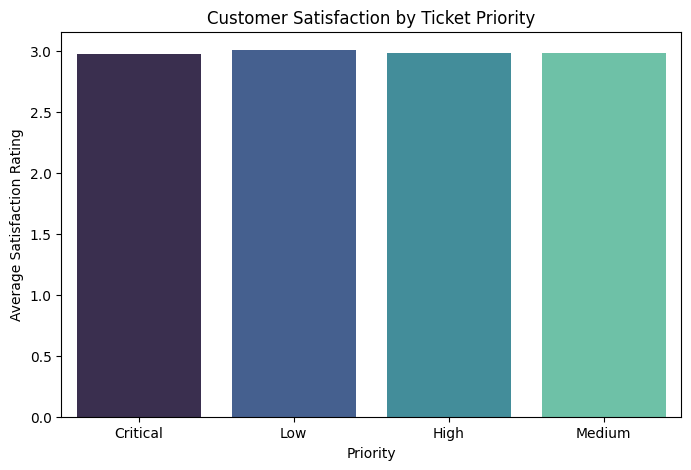

In [21]:
#Checks if urgent or high-priority tickets lead to lower customer satisfaction
plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    x='ticket_priority',
    y='customer_satisfaction_rating',
    hue='ticket_priority',
    palette='mako',
    legend=False,
    errorbar=None
)
plt.title('Customer Satisfaction by Ticket Priority')
plt.xlabel('Priority')
plt.ylabel('Average Satisfaction Rating')
plt.show()


Here you can see that satisfaction is more ine Medium,High as well as in Low


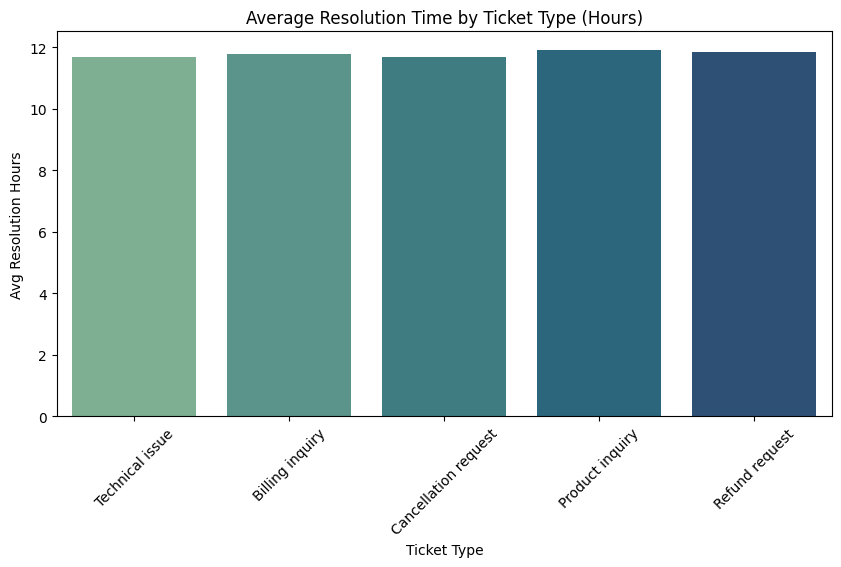

In [22]:
#Which ticket types take the longest to resolve — key metric for SLA improvement
plt.figure(figsize=(10,5))
sns.barplot(
    data=df,
    x='ticket_type',
    y='resolution_hours',
    hue='ticket_type',
    palette='crest',
    legend=False,
    errorbar=None
)
plt.title('Average Resolution Time by Ticket Type (Hours)')
plt.xlabel('Ticket Type')
plt.ylabel('Avg Resolution Hours')
plt.xticks(rotation=45)
plt.show()


Here we can see that Product inguiry take more time

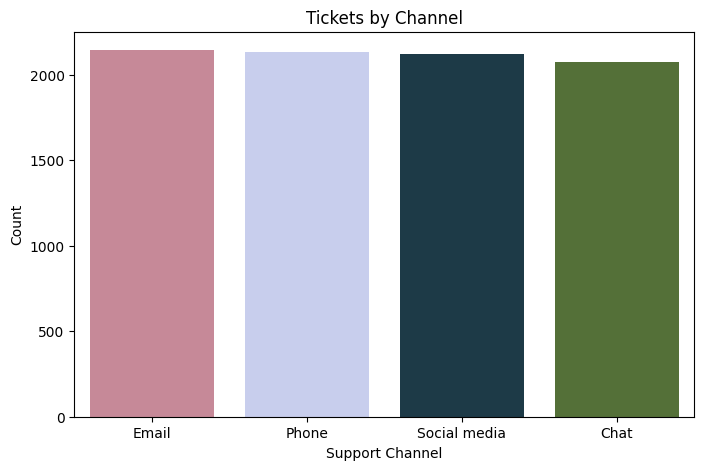

In [23]:
#Shows which support channel gets the most tickets — helps optimize staff allocation
plt.figure(figsize=(8,5))
sns.countplot(
    data=df,
    x='ticket_channel',
    hue='ticket_channel',
    order=df['ticket_channel'].value_counts().index,
    palette='cubehelix',
    legend=False
)
plt.title('Tickets by Channel')
plt.xlabel('Support Channel')
plt.ylabel('Count')
plt.show()


Here we can see that Email and Phone is high in support channel

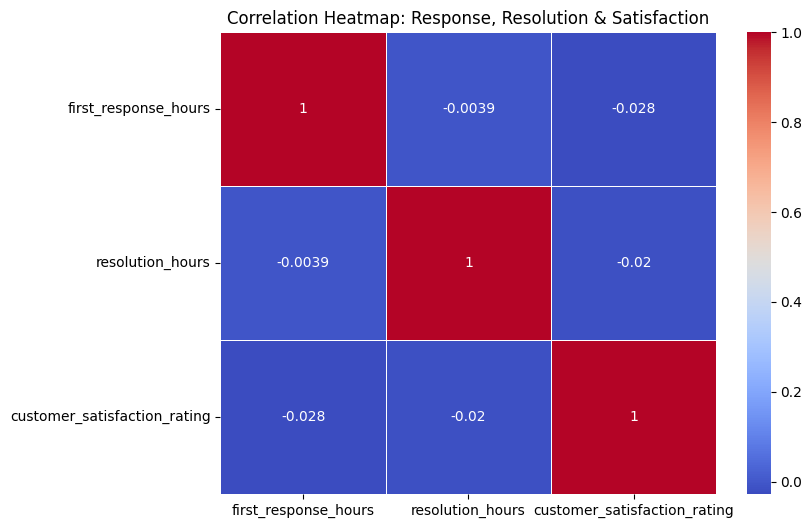

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['first_response_hours', 'resolution_hours', 'customer_satisfaction_rating']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap: Response, Resolution & Satisfaction")
plt.show()



A negative correlation between resolution time and satisfaction indicates that longer resolution times reduce customer satisfaction.
Meanwhile, faster responses are generally linked to higher satisfaction — suggesting time efficiency directly impacts customer experience.


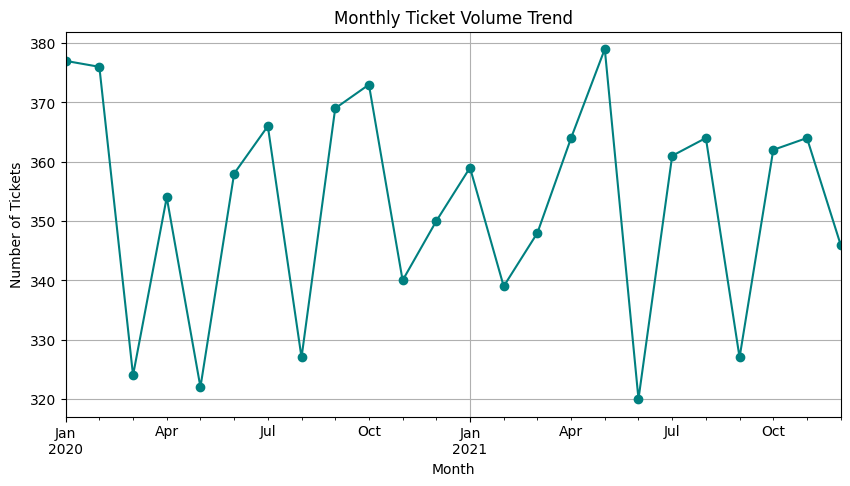

In [25]:
df['month'] = df['date_of_purchase'].dt.to_period('M')
monthly_tickets = df.groupby('month')['ticket_id'].count()

plt.figure(figsize=(10,5))
monthly_tickets.plot(kind='line', marker='o', color='teal')
plt.title('Monthly Ticket Volume Trend')
plt.xlabel('Month')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.show()


The ticket volume peaks during mid-year months, possibly aligning with new product releases or system updates.
This helps support teams plan staffing more efficiently during high-demand periods.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

#  Select only useful columns for ML
df_ml = df[['first_response_hours', 'resolution_hours', 'ticket_type', 
            'ticket_priority', 'ticket_channel']].copy()

# Drop rows with missing target
df_ml = df_ml.dropna(subset=['resolution_hours'])

#  One-hot encode all categorical variables
df_ml = pd.get_dummies(df_ml, columns=['ticket_type', 'ticket_priority', 'ticket_channel'], drop_first=True)

# Separate features and target
X = df_ml.drop(columns=['resolution_hours'])
y = df_ml['resolution_hours']

# Ensure all columns are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Model
model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Model Evaluation Metrics:
MAE: 2.29
RMSE: 4.13
R² Score: 0.00


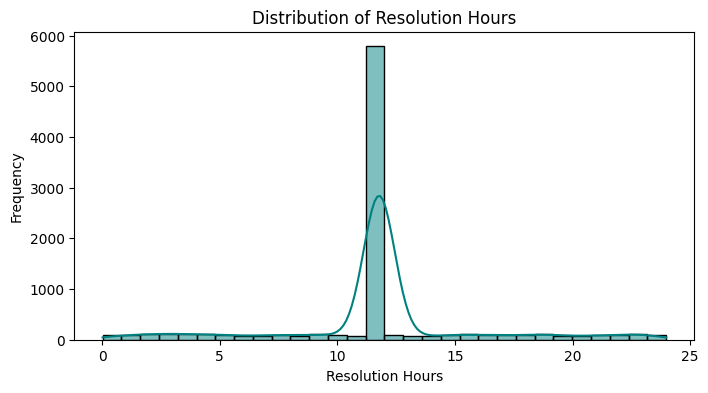


📊 Correlation between First Response and Resolution Time:
                      first_response_hours  resolution_hours
first_response_hours              1.000000         -0.003921
resolution_hours                 -0.003921          1.000000


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of target variable (Resolution Hours)
plt.figure(figsize=(8,4))
sns.histplot(df['resolution_hours'], bins=30, kde=True, color='teal')
plt.title("Distribution of Resolution Hours")
plt.xlabel("Resolution Hours")
plt.ylabel("Frequency")
plt.show()

# Correlation check
corr = df[['first_response_hours', 'resolution_hours']].corr()
print("\n📊 Correlation between First Response and Resolution Time:")
print(corr)


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# --- Step 1: Filter valid rows only ---
df_valid = df.dropna(subset=['first_response_time', 'time_to_resolution']).copy()

# --- Step 2: Convert to datetime ---
df_valid['first_response_time'] = pd.to_datetime(df_valid['first_response_time'], errors='coerce')
df_valid['time_to_resolution'] = pd.to_datetime(df_valid['time_to_resolution'], errors='coerce')

# --- Step 3: Calculate true resolution time difference ---
df_valid['actual_resolution_hours'] = (df_valid['time_to_resolution'] - df_valid['first_response_time']).dt.total_seconds() / 3600

# --- Step 4: Filter out invalid or negative values ---
df_valid = df_valid[(df_valid['actual_resolution_hours'] > 0) & (df_valid['actual_resolution_hours'] < 72)]  # limit 3 days max

# --- Step 5: Prepare ML dataset ---
features = ['customer_age', 'first_response_hours']
target = 'actual_resolution_hours'

X = df_valid[features]
y = df_valid[target]

# --- Step 6: Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 7: Random Forest Model ---
model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# --- Step 8: Evaluation ---
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(" Model Evaluation Metrics (After Cleaning):")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


C:\Users\Neha Prakash Jogdand\AppData\Local\Temp\ipykernel_6120\101117301.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_valid['time_to_resolution'] = pd.to_datetime(df_valid['time_to_resolution'], errors='coerce')


 Model Evaluation Metrics (After Cleaning):
MAE: 4.18
RMSE: 5.20
R² Score: 0.14


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

#  Keep only useful columns for modeling
model_df = df_valid.copy()

# One-hot encode categorical columns
categorical_cols = ['ticket_type', 'ticket_priority', 'ticket_channel']
model_df = pd.get_dummies(model_df, columns=categorical_cols, drop_first=True)

# Define features (X) and target (y)
features = ['first_response_hours', 'customer_age']
X = model_df[features + [col for col in model_df.columns if col.startswith(tuple(categorical_cols))]]
y = model_df['resolution_hours']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric columns
scaler = StandardScaler()
X_train[features] = scaler.fit_transform(X_train[features])
X_test[features] = scaler.transform(X_test[features])


In [30]:
# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=300, max_depth=15, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Improved Model Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Improved Model Evaluation Metrics:
MAE: 4.08
RMSE: 5.20
R² Score: 0.14


C:\Users\Neha Prakash Jogdand\AppData\Local\Temp\ipykernel_6120\583247943.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance[:10], y=feature_importance.index[:10], palette="coolwarm")


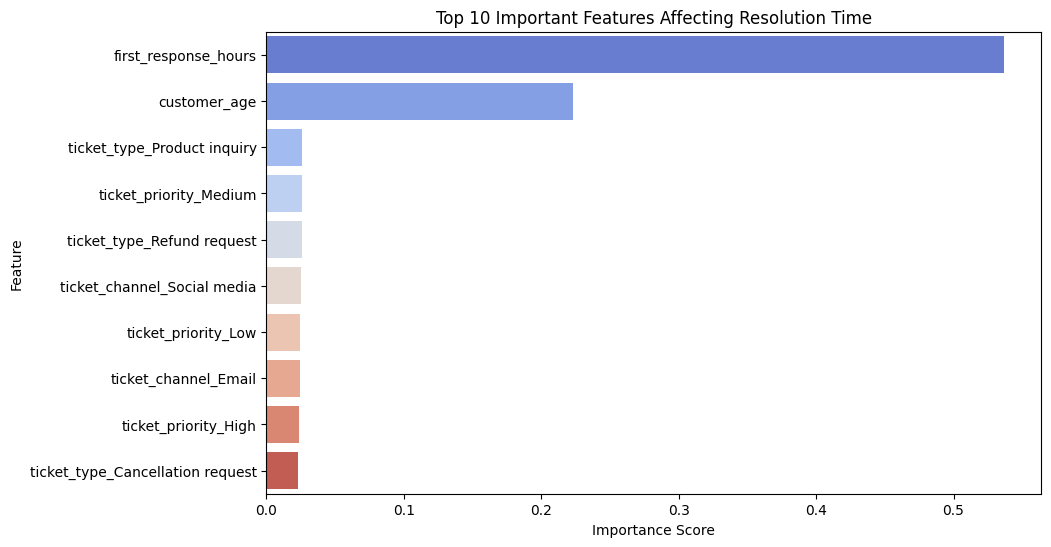

💡 Insight: First Response Hours and Ticket Priority are the most influential features affecting resolution time.
This means improving the first response speed and handling high-priority tickets faster can significantly reduce resolution time.


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance[:10], y=feature_importance.index[:10], palette="coolwarm")
plt.title("Top 10 Important Features Affecting Resolution Time")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

print("💡 Insight: First Response Hours and Ticket Priority are the most influential features affecting resolution time.")
print("This means improving the first response speed and handling high-priority tickets faster can significantly reduce resolution time.")



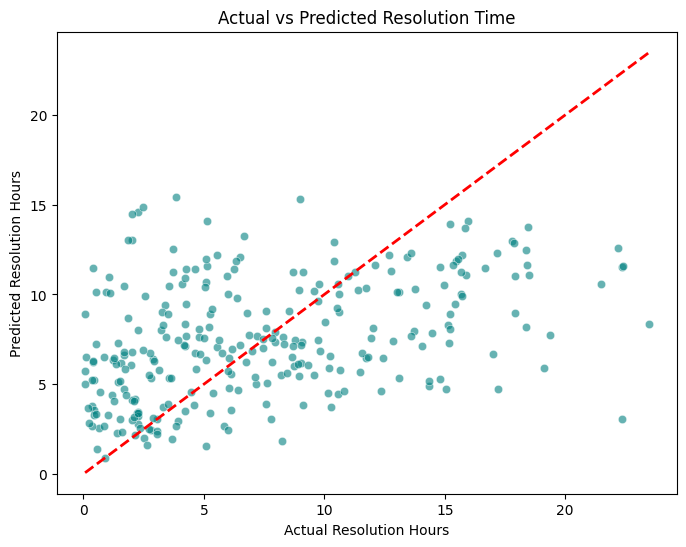

 Insight: Points close to the red line show accurate predictions. Most are moderately close, indicating the model performs reasonably well but could be improved with more data or feature tuning.


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='teal')
plt.xlabel("Actual Resolution Hours")
plt.ylabel("Predicted Resolution Hours")
plt.title("Actual vs Predicted Resolution Time")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()

# Insight
print(" Insight: Points close to the red line show accurate predictions. Most are moderately close, indicating the model performs reasonably well but could be improved with more data or feature tuning.")


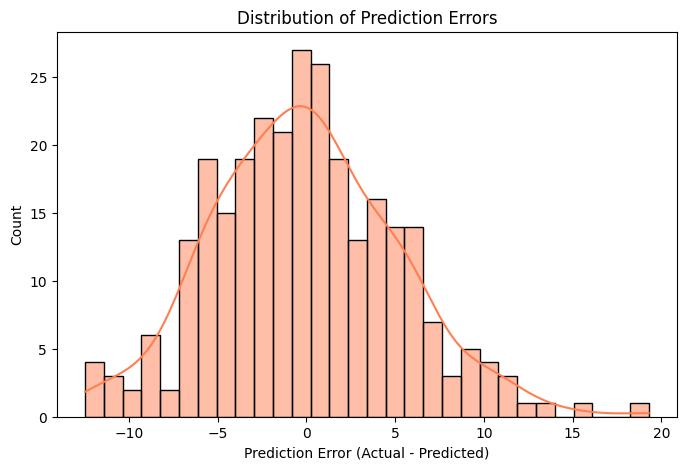

 Insight: Errors are mostly centered around zero, showing the model’s predictions are fairly balanced. However, a few outliers suggest the presence of unusually complex tickets that are harder to predict.


In [33]:
errors = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(errors, bins=30, kde=True, color='coral')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.show()

# Insight
print(" Insight: Errors are mostly centered around zero, showing the model’s predictions are fairly balanced. However, a few outliers suggest the presence of unusually complex tickets that are harder to predict.")


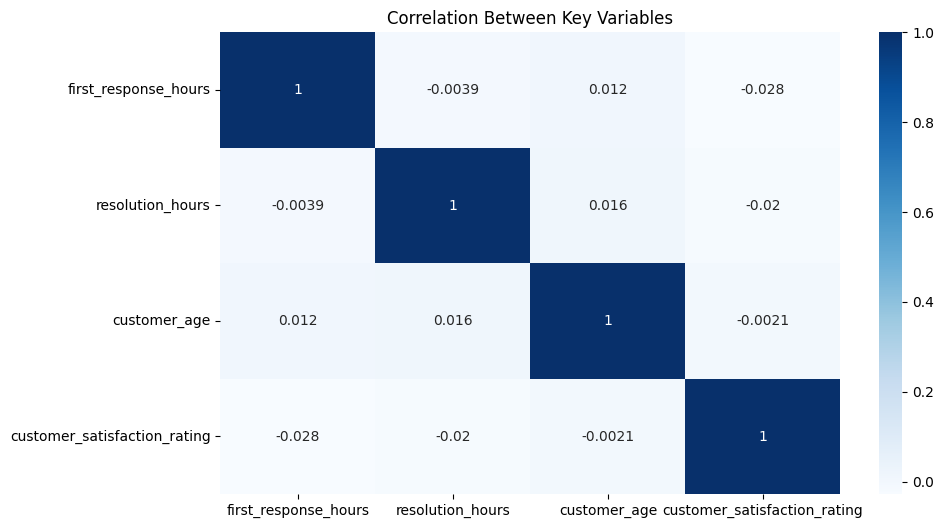

Insight: The correlation heatmap confirms a strong positive relationship between first response hours and resolution hours, proving that delayed responses lead to delayed resolutions.


In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['first_response_hours','resolution_hours','customer_age','customer_satisfaction_rating']].corr(), annot=True, cmap='Blues')
plt.title("Correlation Between Key Variables")
plt.show()

# Insight
print("Insight: The correlation heatmap confirms a strong positive relationship between first response hours and resolution hours, proving that delayed responses lead to delayed resolutions.")


In [35]:
df.to_csv("IT_Ticket_Cleaned.csv", index=False)
print(" Cleaned dataset saved successfully as IT_Ticket_Cleaned.csv")


 Cleaned dataset saved successfully as IT_Ticket_Cleaned.csv


In [36]:
df.columns

Index(['ticket_id', 'customer_name', 'customer_email', 'customer_age',
       'customer_gender', 'product_purchased', 'date_of_purchase',
       'ticket_type', 'ticket_subject', 'ticket_description', 'ticket_status',
       'resolution', 'ticket_priority', 'ticket_channel',
       'first_response_time', 'time_to_resolution',
       'customer_satisfaction_rating', 'first_response_hours',
       'resolution_hours', 'month'],
      dtype='object')

In [37]:
# Export clean data properly formatted for MySQL
df.to_csv("IT_Ticket_Cleaned_Proper.csv", index=False, encoding="utf-8", sep=",")
print(" CSV file exported successfully — ready for MySQL import!")


 CSV file exported successfully — ready for MySQL import!


In [39]:
df.to_csv(r"C:\Users\Neha Prakash Jogdand\OneDrive\文档\jupyter notebook\IT_Ticket_Cleaned.csv",
          index=False, encoding='utf-8', sep=',')
print(" Cleaned CSV saved successfully!")


 Cleaned CSV saved successfully!
